Основы работы с conda

conda — это менеджер пакетов и окружений, который часто используется в Data Science и MLOps для управления зависимостями и изоляции проектов.

Если у тебя еще не установлен conda, ты можешь установить его, скачав Miniconda #[https://docs.conda.io/en/latest/miniconda.html] или Anaconda [https://www.anaconda.com/download].

## Основные команды conda
### 1. Создание нового окружения:
conda create --name test_env python=3.10
### 2. Активация окружения:
conda activate myenv
### 3. Деактивация окружения:
conda deactivate
### 4. Установка пакетов:
conda install numpy pandas
### 5. Удаление пакетов:
conda remove numpy
### 6. Экспорт окружения в файл:
conda env export > environment.yml

In [29]:
!systeminfo /S ASUS-VIVOBOOK-M


Host Name:                     ASUS-VIVOBOOK-M
OS Name:                       Майкрософт Windows 11 Pro
OS Version:                    10.0.26100 N/A Build 26100
OS Manufacturer:               Microsoft Corporation
OS Configuration:              Standalone Workstation
OS Build Type:                 Multiprocessor Free
Registered Owner:              Артём
Registered Organization:       
Product ID:                    00330-80000-00000-AA257
Original Install Date:         20.02.2025, 2:19:10
System Boot Time:              20.02.2025, 13:04:20
System Manufacturer:           ASUSTeK COMPUTER INC.
System Model:                  Vivobook_ASUSLaptop M6500QC_M6500QC
System Type:                   x64-based PC
Processor(s):                  1 Processor(s) Installed.
                               [01]: AMD64 Family 25 Model 80 Stepping 0 AuthenticAMD ~3201 Mhz
BIOS Version:                  American Megatrends International, LLC. M6500QC.311, 06.04.2023
Windows Directory:             C:\WINDOW

In [30]:
#Пример получения списка установленный пакетов в системе и запись в файл list_libs.yml
!conda list > list_libs.yml

In [39]:
#Вывод списка библиотек из файла начинающихся на "n"
!findstr /B "n" list_libs.yml

navigator-updater         0.5.1           py312haa95532_0  
nbclient                  0.8.0           py312haa95532_0  
nbconvert                 7.16.4          py312haa95532_0  
nbformat                  5.10.4          py312haa95532_0  
nest-asyncio              1.6.0           py312haa95532_0  
networkx                  3.3             py312haa95532_0  
nltk                      3.9.1           py312haa95532_0  
notebook                  7.2.2           py312haa95532_1  
notebook-shim             0.2.3           py312haa95532_0  
numba                     0.60.0          py312h0158946_0  
numexpr                   2.8.7           py312h96b7d27_0  
numpy                     1.26.4          py312hfd52020_0  
numpy-base                1.26.4          py312h4dde369_0  
numpydoc                  1.7.0           py312haa95532_0  


## Основные команды pip

In [40]:
!pip list 

Package                           Version
--------------------------------- ------------------
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           6.1.3
astropy-iers-data

In [44]:
!pip show apache-airflow

Name: apache-airflow
Version: 2.10.5
Summary: Programmatically author, schedule and monitor data pipelines
Home-page: https://airflow.apache.org/
Author: 
Author-email: Apache Software Foundation <dev@airflow.apache.org>
License: 
Location: C:\Users\Artem Markov\anaconda3\Lib\site-packages
Requires: alembic, apache-airflow-providers-common-compat, apache-airflow-providers-common-io, apache-airflow-providers-common-sql, apache-airflow-providers-fab, apache-airflow-providers-ftp, apache-airflow-providers-http, apache-airflow-providers-imap, apache-airflow-providers-smtp, apache-airflow-providers-sqlite, argcomplete, asgiref, attrs, blinker, colorlog, configupdater, connexion, cron-descriptor, croniter, cryptography, deprecated, dill, flask, flask-caching, flask-session, flask-wtf, fsspec, google-re2, gunicorn, httpx, itsdangerous, jinja2, jsonschema, lazy-object-proxy, linkify-it-py, lockfile, markdown-it-py, markupsafe, marshmallow-oneofschema, mdit-py-plugins, methodtools, opentelemetr

In [46]:
!wmic cpu get name,NumberOfCores,NumberOfLogicalProcessors

Name                                    NumberOfCores  NumberOfLogicalProcessors  

AMD Ryzen 7 5800H with Radeon Graphics  8              16                         





### Библиотека Pytorch
PyTorch — это библиотека для машинного обучения, предназначенная для построения архитектур нейронных сетей и обучения.

In [50]:
import torch

In [51]:
a = torch.tensor([1.,2,3])
b = torch.tensor([3,-2,1])
c = a + b
c

tensor([4., 0., 4.])

In [52]:
torch.cuda.is_available()

False

In [53]:
a = torch.tensor([1.,2,3], requires_grad=True)
b = a + 2
c = a * a * 2
c = c.mean()
c.backward()  # Вычисляет градиенты
print(a.grad)

tensor([1.3333, 2.6667, 4.0000])


### Пример обучения нейронной сети для изображений

In [57]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

#Пример построения графа нейросети с полносвязнными слоями
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()

In [58]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

class PatchEmbedding(nn.Module):
    def __init__(self, img_size, patch_size, in_channels, embed_dim):
        super(PatchEmbedding, self).__init__()
        self.patch_size = patch_size
        self.proj = nn.Conv2d(in_channels, embed_dim, kernel_size=patch_size, stride=patch_size)

    def forward(self, x):
        x = self.proj(x)  # (B, C, H, W) -> (B, embed_dim, H/patch_size, W/patch_size)
        x = x.flatten(2)  # (B, embed_dim, H/patch_size * W/patch_size)
        x = x.transpose(1, 2)  # (B, H/patch_size * W/patch_size, embed_dim)
        return x

class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert embed_dim % num_heads == 0

        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        self.query_linear = nn.Linear(embed_dim, embed_dim)
        self.key_linear = nn.Linear(embed_dim, embed_dim)
        self.value_linear = nn.Linear(embed_dim, embed_dim)
        self.out_linear = nn.Linear(embed_dim, embed_dim)

    def attention(self, query, key, value, mask=None):
        scores = torch.matmul(query, key.transpose(-2, -1)) / torch.sqrt(torch.tensor(self.head_dim, dtype=torch.float32))
        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)
        attn = F.softmax(scores, dim=-1)
        context = torch.matmul(attn, value)
        return context, attn

    def forward(self, x):
        batch_size = x.size(0)

        query = self.query_linear(x).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        key = self.key_linear(x).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        value = self.value_linear(x).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)

        context, _ = self.attention(query, key, value)
        context = context.transpose(1, 2).contiguous().view(batch_size, -1, self.embed_dim)
        return self.out_linear(context)

class FeedForward(nn.Module):
    def __init__(self, embed_dim, hidden_dim, dropout=0.1):
        super(FeedForward, self).__init__()
        self.linear1 = nn.Linear(embed_dim, hidden_dim)
        self.dropout = nn.Dropout(dropout)
        self.linear2 = nn.Linear(hidden_dim, embed_dim)

    def forward(self, x):
        return self.linear2(self.dropout(F.relu(self.linear1(x))))

class TransformerLayer(nn.Module):
    def __init__(self, embed_dim, num_heads, hidden_dim, dropout=0.1):
        super(TransformerLayer, self).__init__()
        self.attn = MultiHeadAttention(embed_dim, num_heads)
        self.ff = FeedForward(embed_dim, hidden_dim, dropout)
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        attn_output = self.attn(x)
        out1 = self.norm1(x + self.dropout(attn_output))
        ff_output = self.ff(out1)
        out2 = self.norm2(out1 + self.dropout(ff_output))
        return out2

class VisionTransformer(nn.Module):
    def __init__(self, img_size, patch_size, in_channels, embed_dim, num_heads, hidden_dim, num_layers, num_classes, dropout=0.1):
        super(VisionTransformer, self).__init__()
        self.patch_embed = PatchEmbedding(img_size, patch_size, in_channels, embed_dim)
        self.layers = nn.ModuleList([
            TransformerLayer(embed_dim, num_heads, hidden_dim, dropout)
            for _ in range(num_layers)
        ])
        self.linear = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        x = self.patch_embed(x)
        for layer in self.layers:
            x = layer(x)
        x = x.mean(dim=1)  # Усреднение по последовательности
        return self.linear(x)

# Пример использования
img_size = 28
patch_size = 8
in_channels = 1  # Для черно-белых изображений
embed_dim = 14
num_heads = 2
hidden_dim = 6
num_layers = 1
num_classes = 10  # Например, для классификации цифр от 0 до 9
dropout = 0.1

model = VisionTransformer(img_size, patch_size, in_channels, embed_dim, num_heads, hidden_dim, num_layers, num_classes, dropout)

# Пример входных данных
x = torch.rand(1, in_channels, img_size, img_size)  # Батч из 32 изображений размером 28x28

output = model(x)
print(output.shape)  # Выходной тензор

torch.Size([1, 10])


In [59]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
dataset1 = MNIST('../data', train=True, download=True,
                   transform=transform)
dataset2 = MNIST('../data', train=False,
                   transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1,)
test_loader = torch.utils.data.DataLoader(dataset2)

100%|██████████| 9.91M/9.91M [00:07<00:00, 1.41MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 191kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.20MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.53MB/s]


In [60]:
inputs, labels = next(iter(train_loader)) 
print(inputs.shape, labels.shape)

torch.Size([1, 1, 28, 28]) torch.Size([1])


In [61]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9)

In [62]:
for epoch in tqdm(range(15)):  # Количество эпох
    correct = 0
    for data in test_loader:  # Итерация по данным
        inputs, labels = data
        optimizer.zero_grad()  # Обнуление градиентов
        outputs = model(inputs)  # Прямой проход
        loss = criterion(outputs, labels)  # Вычисление потерь
        
        loss.backward()  # Обратный проход
        optimizer.step()  # Обновление весов
        pred = outputs.argmax(dim=1, keepdim=True)
        correct += pred.eq(labels).item()
    print('Accuracy: {:.0f}%)\n'.format(correct/len(test_loader)*100))

  7%|▋         | 1/15 [00:33<07:49, 33.55s/it]

Accuracy: 36%)



 13%|█▎        | 2/15 [01:05<07:07, 32.87s/it]

Accuracy: 37%)



 20%|██        | 3/15 [01:36<06:23, 31.98s/it]

Accuracy: 41%)



 27%|██▋       | 4/15 [02:07<05:44, 31.33s/it]

Accuracy: 44%)



 33%|███▎      | 5/15 [02:37<05:10, 31.10s/it]

Accuracy: 35%)



 40%|████      | 6/15 [03:08<04:39, 31.02s/it]

Accuracy: 38%)



 47%|████▋     | 7/15 [03:40<04:11, 31.40s/it]

Accuracy: 40%)



 53%|█████▎    | 8/15 [04:11<03:36, 31.00s/it]

Accuracy: 41%)



 60%|██████    | 9/15 [04:42<03:06, 31.04s/it]

Accuracy: 41%)



 67%|██████▋   | 10/15 [05:16<02:39, 31.95s/it]

Accuracy: 43%)



 73%|███████▎  | 11/15 [05:49<02:08, 32.24s/it]

Accuracy: 43%)



 80%|████████  | 12/15 [06:23<01:38, 32.92s/it]

Accuracy: 42%)



 87%|████████▋ | 13/15 [06:58<01:07, 33.65s/it]

Accuracy: 44%)



 93%|█████████▎| 14/15 [07:33<00:33, 33.86s/it]

Accuracy: 43%)



100%|██████████| 15/15 [08:09<00:00, 32.65s/it]

Accuracy: 44%)



In [63]:
number = 100
test_img, test_label = test_loader.dataset[number]
test_img = test_img.unsqueeze(0)
torch.argmax(model(test_img)), test_label

(tensor(7), 6)

In [64]:
#посмотрим как модель предсказывает цифры
for number in range(15):
    test_img, test_label = test_loader.dataset[number]
    test_img = test_img.unsqueeze(0)
    print(f"Pred = {torch.argmax(model(test_img))}, Label = {test_label}")

Pred = 7, Label = 7
Pred = 0, Label = 2
Pred = 1, Label = 1
Pred = 6, Label = 0
Pred = 7, Label = 4
Pred = 1, Label = 1
Pred = 0, Label = 4
Pred = 6, Label = 9
Pred = 4, Label = 5
Pred = 8, Label = 9
Pred = 3, Label = 0
Pred = 6, Label = 6
Pred = 7, Label = 9
Pred = 7, Label = 0
Pred = 1, Label = 1


## Визуализация прогнозов модели

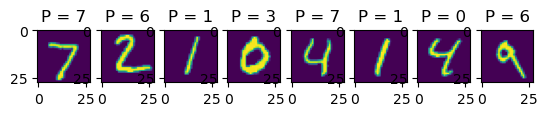

In [65]:
fig, ax = plt.subplots(1,8)
for number in range(8):
    test_img, test_label = test_loader.dataset[number]
    test_img = test_img.unsqueeze(0)
    pred = torch.argmax(model(test_img))
    ax[number].imshow(test_img[0][0].numpy())
    ax[number].set_title(f"P = {pred}")

### Обучение модели линеной регрессии

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import root_mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [69]:
# В качестве набора данных используется история продаж автомобилей. Для целевой переменной используем Price(euro) - стоимость авто

In [70]:
df = pd.read_csv('https://raw.githubusercontent.com/dayekb/Basic_ML_Alg/main/cars_moldova_no_dup.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
37259,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
37260,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
37261,Renault,Modus,2009,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
37262,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


In [71]:

cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)']

question_dist = df[(df.Year <2021) & (df.Distance < 1100)]
df = df.drop(question_dist.index)
# Анализ и очистка данных
# анализ гистограмм
question_dist = df[(df.Distance > 1e6)]
df = df.drop(question_dist.index)

# здравый смысл
question_engine = df[df["Engine_capacity(cm3)"] < 200]
df = df.drop(question_engine.index)

# здравый смысл
question_engine = df[df["Engine_capacity(cm3)"] > 5000]
df = df.drop(question_engine.index)

# здравый смысл
question_price = df[(df["Price(euro)"] < 101)]
df = df.drop(question_price.index)

# анализ гистограмм
question_price = df[df["Price(euro)"] > 1e5]
df = df.drop(question_price.index)

#анализ гистограмм
question_year = df[df.Year < 1971]
df = df.drop(question_year.index)

df = df.reset_index(drop=True)  # обновим индексы в датафрейме DF. если бы мы прописали drop = False, то была бы еще одна колонка - старые индексы
# Разделение данных на признаки и целевую переменную


# Предварительная обработка категориальных данных
# Порядковое кодирование. Обучение, трансформация и упаковка в df

ordinal = OrdinalEncoder()
ordinal.fit(df[cat_columns]);
Ordinal_encoded = ordinal.transform(df[cat_columns])
df_ordinal = pd.DataFrame(Ordinal_encoded, columns=cat_columns)
df[cat_columns] = df_ordinal[cat_columns]

In [72]:
X,y = df.drop(columns = ['Price(euro)']), df['Price(euro)']
scaler = StandardScaler()
power_trans = PowerTransformer()
X_scale = scaler.fit_transform(X.values)

Y_scale = power_trans.fit_transform(y.values.reshape(-1,1))

In [73]:
features_names = X.columns.to_list()

In [74]:
# разбиваем на тестовую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X_scale, Y_scale,
                                                  test_size=0.3,
                                                  random_state=42)

### Обучение линейной регрессии

In [75]:
model = SGDRegressor()
model.fit(X_train, y_train)
r = model.score(X_train, y_train)
print('R^2 = ', r) # Метрика R^2

R^2 =  0.7092590084519377


C:\Users\Artem Markov\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Оценим ошибку модели

In [76]:
y_pred = model.predict(X_val)
y_price = power_trans.inverse_transform(y_pred.reshape(-1,1))
print("Средняя ошибка прогноза модели =", root_mean_squared_error(power_trans.inverse_transform(y_val.reshape(-1,1)), y_price))

Средняя ошибка прогноза модели = 5869.9124408484795


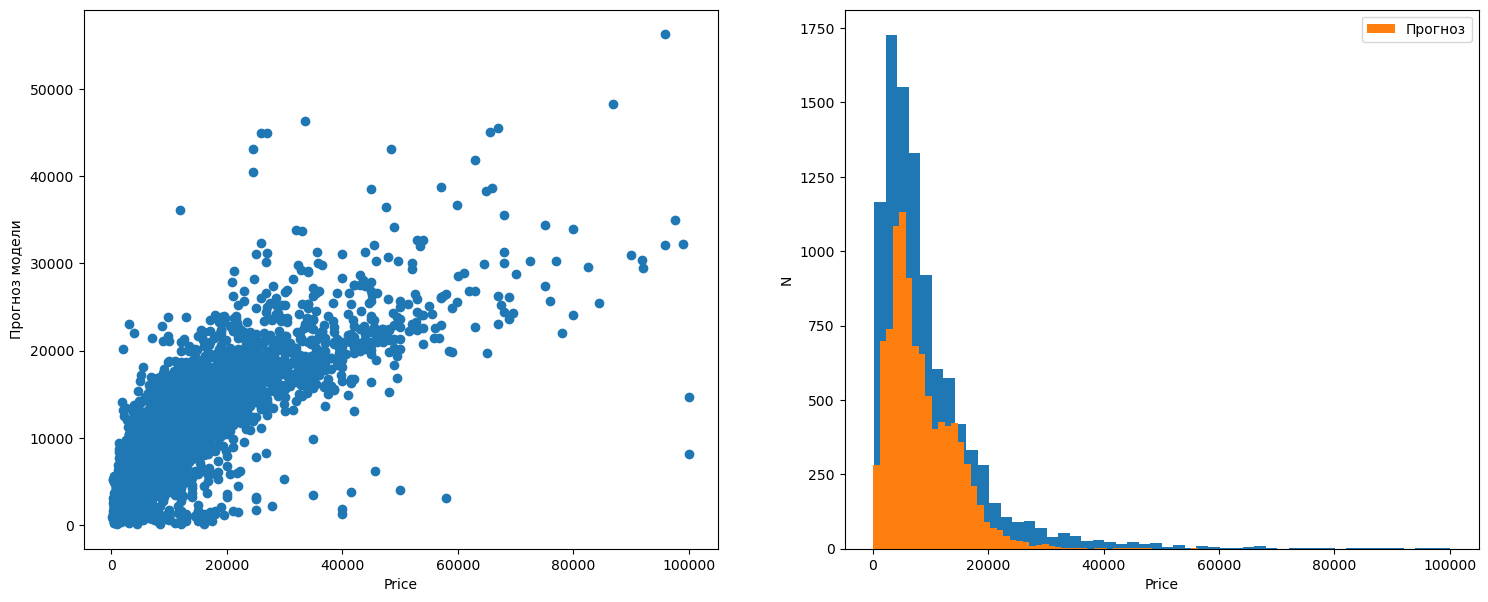

In [77]:
y = power_trans.inverse_transform(y_val.reshape(-1,1))
fig,ax = plt.subplots(1,2, dpi = 100, figsize=(18,7))
ax[0].scatter( y, y_price,)
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Прогноз модели')

ax[1].hist( y,50)
ax[1].hist( y_price,50, label='Прогноз')

ax[1].set_xlabel('Price')
ax[1].set_ylabel('N')

In [78]:
##Сохраним модель
with open('model_lr.pkl', 'wb') as file:
    pickle.dump(model, file)

### Задание. Лабораторная работа №1

1.Выполнить установку и настройку необходимых библитек для работы с ML. Выполнить ячейки ноутбука (5 баллов)

2.Произвести обучение одной модели (Нейронной сети или линейнойной регрессии) (5 баллов)

За обучение модели на своих данных +5 баллов 

In [43]:
## Данные были взяты из:
# https://archive.ics.uci.edu/dataset/186/wine+quality

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pickle

In [28]:
data = pd.read_csv('winequality-red.csv', sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.41
R-squared: 0.35


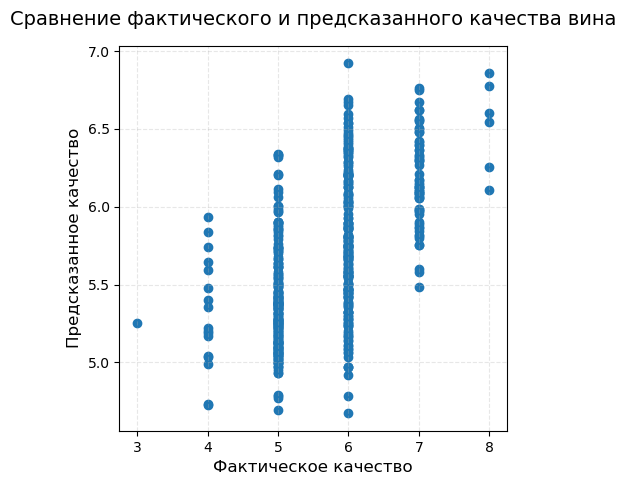

In [42]:
# Визуализация предсказаний vs реальных значений
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred)
plt.xlabel('Фактическое качество', fontsize=12)
plt.ylabel('Предсказанное качество', fontsize=12)
plt.title('Сравнение фактического и предсказанного качества вина', fontsize=14, pad=15)
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()

In [44]:
with open('model_wine.pkl', 'wb') as file:
    pickle.dump(model, file)